In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,12))
plt.style.use('seaborn')

<Figure size 720x864 with 0 Axes>

In [2]:
from jupyterworkflow.data import get_data

In [3]:
data = get_data()
data.head()

,West,East,Total
Date,,,
2014-12-01,23689,24818,48507
2012-11-01,26062,24585,50647
2012-12-01,18608,17761,36369
2015-01-01,35754,24876,60630
2017-12-01,18946,26916,45862


In [4]:
from urllib.request import urlretrieve
urlretrieve(url,'Fremont.csv')

NameError: name 'Fremont_url' is not defined

In [5]:
import pandas as pd 
data = pd.read_csv('Fremont.csv')
data.head()


,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,12/01/2014 12:00:00 AM,23689,24818
1,11/01/2012 12:00:00 AM,26062,24585
2,12/01/2012 12:00:00 AM,18608,17761
3,01/01/2015 12:00:00 AM,35754,24876
4,12/01/2017 12:00:00 AM,18946,26916


In [ ]:
#import pandas as pd 
#data = pd.read_csv('Fremont.csv', index_col= 'Date', parse_dates = True)


In [6]:
data.describe()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
count,67.000000,67.000000
mean,39697.537313,40250.940299
std,15467.539714,13602.164659
min,17385.000000,17761.000000
25%,27892.500000,28802.500000
50%,36440.000000,38507.000000
75%,51008.000000,52135.500000
max,107801.000000,70421.000000


In [7]:
data.count()

Date                            67
Fremont Bridge West Sidewalk    67
Fremont Bridge East Sidewalk    67
dtype: int64

In [9]:
data.resample('Y').sum().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

<Figure size 720x864 with 0 Axes>

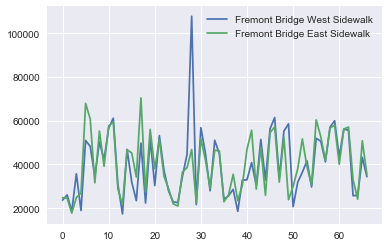

In [10]:

#data.resample('W').sum().plot()
plt.figure(figsize=(10,12))
data.plot()


In [15]:
data.resample('W').sum().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

KeyError: 'East'

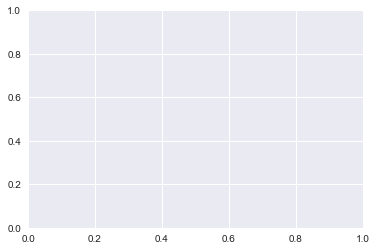

In [12]:
plt.subplots()
data['East'].resample('W').sum().plot(legend=True)
data['West'].resample('W').sum().plot(legend = True)

KeyError: 'East'

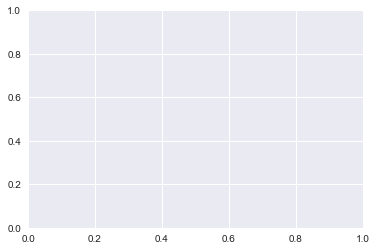

In [13]:
plt.subplots()
data['East'].resample('H').sum().plot(legend=True)
data['West'].resample('H').sum().plot(legend = True)

In [14]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

KeyError: 'West'

In [ ]:
data['Total'] = data['West'] + data['East']
ax = data.resample('H').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

In [ ]:
data.groupby(data.index).mean().plot()

In [ ]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:10,:5]

In [ ]:
#pivoted.plot(legend = False)

In [ ]:
pivoted.index[:24]

In [ ]:
data.index

In [ ]:
import numpy as np
np.unique(data.index)